In [1]:
# pip install jsonlines

In [2]:
# imports
# from openai import OpenAI
import statistics
import pandas as pd
import json
import jsonlines

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
from ctypes import alignment
import numpy as np

In [3]:
my_pal = {"conservative": "#ff6161", "liberal": "#6171ff", 'non-aligned':"#ffb347", 'moderate':"#ffb347"}


# graphs n stuff

In [4]:
data = pd.read_csv(r"C:\Users\llste\Desktop\LLM-Ethics-1\lorraine_paper2\results\simple_combined.csv")
data.head()

C:\Users\llste\AppData\Local\Temp\ipykernel_28844\1644518349.py:1: DtypeWarning: Columns (2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\llste\Desktop\LLM-Ethics-1\lorraine_paper2\results\simple_combined.csv")


,Unnamed: 0.1,Unnamed: 0,politics,alignment,category,response,source,model,temperature,nickname,trial,origin
0,0,0.0,Strongly Liberal,liberal,harm,2.00,human,homo sapiens neurons,NaN,human,1,NaN
1,1,1.0,Strongly Liberal,liberal,harm,3.00,human,homo sapiens neurons,NaN,human,1,NaN
2,2,4.0,Strongly Liberal,liberal,harm,4.00,human,homo sapiens neurons,NaN,human,1,NaN
3,3,5.0,Strongly Liberal,liberal,harm,1.25,human,homo sapiens neurons,NaN,human,1,NaN
4,4,6.0,Strongly Liberal,liberal,harm,4.00,human,homo sapiens neurons,NaN,human,1,NaN


In [5]:
data = data.loc[data['source'] == 'human']
data.head()

,Unnamed: 0.1,Unnamed: 0,politics,alignment,category,response,source,model,temperature,nickname,trial,origin
0,0,0.0,Strongly Liberal,liberal,harm,2.00,human,homo sapiens neurons,NaN,human,1,NaN
1,1,1.0,Strongly Liberal,liberal,harm,3.00,human,homo sapiens neurons,NaN,human,1,NaN
2,2,4.0,Strongly Liberal,liberal,harm,4.00,human,homo sapiens neurons,NaN,human,1,NaN
3,3,5.0,Strongly Liberal,liberal,harm,1.25,human,homo sapiens neurons,NaN,human,1,NaN
4,4,6.0,Strongly Liberal,liberal,harm,4.00,human,homo sapiens neurons,NaN,human,1,NaN


In [6]:
data = data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
data = data.reset_index(drop=True)

In [7]:
data["response"] = data["response"] + 1
data["source"] = data["source"].str.title()
data["alignment"] = data["alignment"].str.title()
data["category"] = data["category"].str.title()

In [8]:
display(data)

,politics,alignment,category,response,source,model,temperature,nickname,trial,origin
0,Strongly Liberal,Liberal,Harm,3.000,Human,homo sapiens neurons,NaN,human,1,NaN
1,Strongly Liberal,Liberal,Harm,4.000,Human,homo sapiens neurons,NaN,human,1,NaN
2,Strongly Liberal,Liberal,Harm,5.000,Human,homo sapiens neurons,NaN,human,1,NaN
3,Strongly Liberal,Liberal,Harm,2.250,Human,homo sapiens neurons,NaN,human,1,NaN
4,Strongly Liberal,Liberal,Harm,5.000,Human,homo sapiens neurons,NaN,human,1,NaN
...,...,...,...,...,...,...,...,...,...,...
6689,Strongly Conservative,Conservative,Purity,3.725,Human,homo sapiens neurons,NaN,human,1,NaN
6690,Strongly Conservative,Conservative,Purity,4.050,Human,homo sapiens neurons,NaN,human,1,NaN
6691,Strongly Conservative,Conservative,Purity,4.475,Human,homo sapiens neurons,NaN,human,1,NaN
6692,Strongly Conservative,Conservative,Purity,4.600,Human,homo sapiens neurons,NaN,human,1,NaN


In [11]:
my_pal = {"Conservative": "#ff6161", "Liberal": "#6171ff", 'Non-Aligned':"#ffb347"}



In [22]:
data.category.unique()

array(['Harm', 'Fairness', 'Ingroup', 'Authority', 'Purity'], dtype=object)

In [39]:
def single_pillar_boxplot(df, ax=None, title="", show_legend=False):
    sns.set_theme(font_scale=3)

    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 15))

    sns.boxplot(data=df, x="alignment", y="response", hue='alignment', palette=my_pal, whis=(0, 95), ax=ax)

    # if not show_legend:
    #     ax.get_legend().remove()
        
	# ax.refline(x = 20,
    #       color = "blue",
    #       lw = 3)

    ax.set_xlabel('')
    ax.set_ylabel('Response', fontsize=35)
    ax.set_title(title.title(),fontsize=50)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='x', which='minor', labelsize=30)
    # ax.fontsize=50
    return ax

0
1
2


C:\Users\llste\AppData\Local\Temp\ipykernel_28844\388738148.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  f_legend = ax.legend()
C:\Users\llste\AppData\Local\Temp\ipykernel_28844\388738148.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  f_legend = ax.legend()
C:\Users\llste\AppData\Local\Temp\ipykernel_28844\388738148.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  f_legend = ax.legend()


3
4


C:\Users\llste\AppData\Local\Temp\ipykernel_28844\388738148.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  f_legend = ax.legend()
C:\Users\llste\AppData\Local\Temp\ipykernel_28844\388738148.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  f_legend = ax.legend()


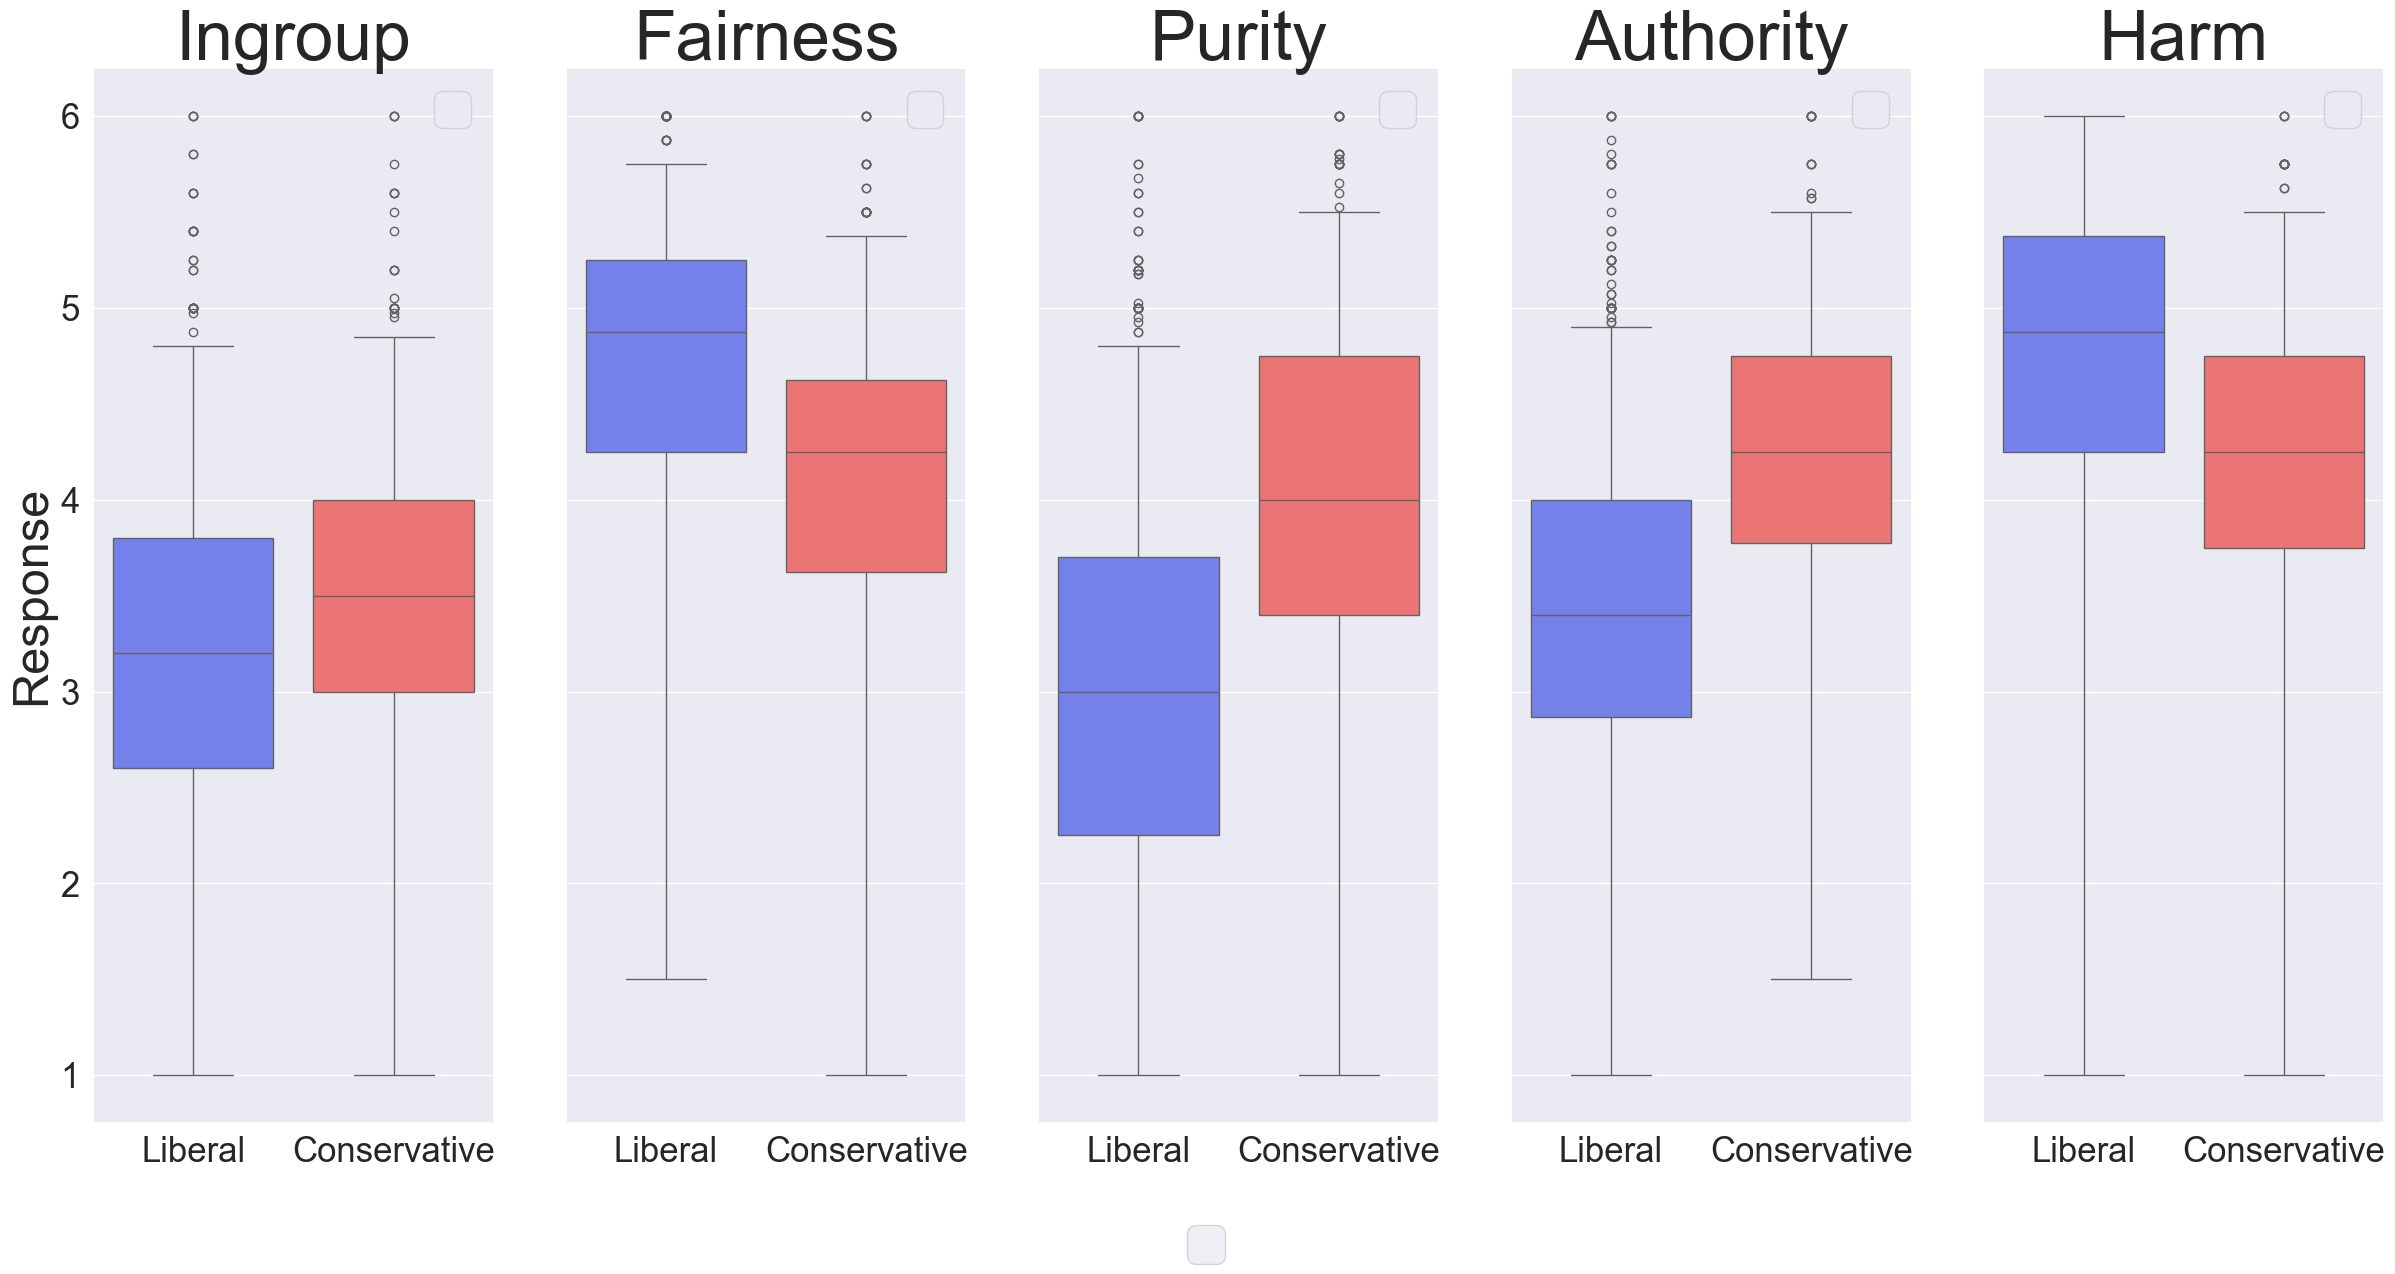

In [ ]:
my_pal = {"Conservative": "#ff6161", "Liberal": "#6171ff", 'Non-Aligned':"#ffb347"}

def graph_all(df):
	# cats = df['category'].unique()
	# df = df[df['model'] == model]
	cats = ['Ingroup', 'Fairness', 'Purity', 'Authority', 'Harm']
	# alignments = df['alignment'].unique()
	# sources = df['source'].unique()
	df['source'] = pd.Categorical(df['source'], categories=['Inherent', 'Explicit', 'Persona'], ordered=True)

	fig, axes = plt.subplots(1, 5, figsize=(5*len(cats), 15), sharey=True)

	for i, (cat, ax) in enumerate(zip(cats, axes)):
		print(i)
		# Only show y-label on first plot


		df_filtered = df[df['category'] == cat]
		ax = single_pillar_boxplot(df_filtered, ax,  cat, cat =='Ingroup')

		if i == 0:
			f_legend = ax.legend()
		else:
			ax.get_legend().remove()
			if i > 0:
		ax.set_ylabel('')


	fig.legend(f_legend.legend_handles, [t.get_text() for t in f_legend.texts], 
	title=f_legend.get_title().get_text(),
	title_fontsize=40,
	fontsize=35,
	loc='upper center', 
	bbox_to_anchor=(0.5, 0.15),  # Centered at bottom of figure
	ncol=3)  # Display all alignment categories in one row

	# Add a common x-label for all subplots
	# fig.text(0.5, 0.105, 'source', ha='center', fontsize=15)
	# fig.suptitle("Human")

	# Adjust layout - leave space at bottom for common x-label and legend
	fig.tight_layout(rect=[0, 0.135, 1, 0.98])

graph_all(data)

In [ ]:
graph_all(simple_combined, 'vicuna')

NameError: name 'simple_combined' is not defined